## **Análise exploratória**

### **Preparando o dataset**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('variaveis_totais.csv')

In [3]:
df = df[['country','country_code','indicator','year','value']]

In [4]:
df.head()

,country,country_code,indicator,year,value
0,Albania,ALB,gdp_growth,1960,NaN
1,Albania,ALB,gdp_growth,1961,NaN
2,Albania,ALB,gdp_growth,1962,NaN
3,Albania,ALB,gdp_growth,1963,NaN
4,Albania,ALB,gdp_growth,1964,NaN


In [5]:
df_gdp_growth = df[0:2356]
df_gdp_p_cap = df[2357:4711]
df_inflation = df[4712:7068]
df_life_exp = df[7069:9424]

### **1. Exemplo de cálculo de impacto (Interativo)**

### 1.1. Apenas 1 país

#### Para GDP Growth

In [6]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_gg = round(df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_gg = round(df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country][df_gdp_growth[df_gdp_growth.country==country].year <= year+lag].year > year].value.mean(),2)

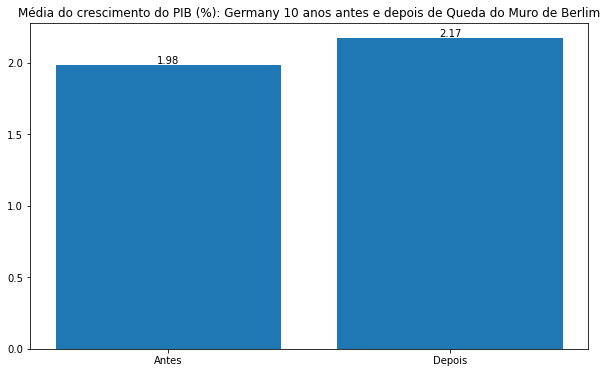

In [19]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Média do crescimento do PIB (%): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_gg,post_gg])
for i, v in enumerate([pre_gg,post_gg]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para GDP per Capita

In [8]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_gpc = round(df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_gpc = round(df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country][df_gdp_p_cap[df_gdp_p_cap.country==country].year <= year+lag].year > year].value.mean(),2)

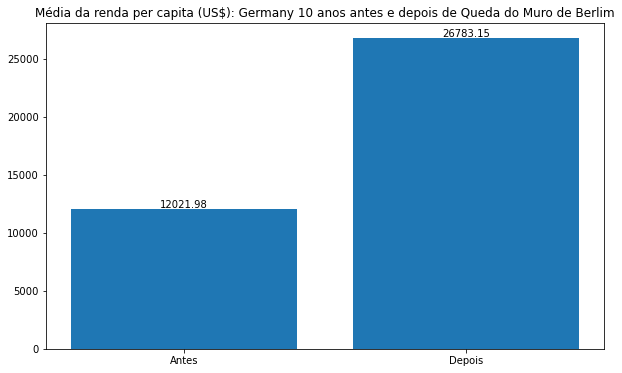

In [18]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Média da renda per capita (US$): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_gpc,post_gpc])
for i, v in enumerate([pre_gpc,post_gpc]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Inflation

In [10]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_i = round(df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year >= year-lag][df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_i = round(df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year <= year+lag][df_inflation[df_inflation.country==country][df_inflation[df_inflation.country==country].year <= year+lag].year > year].value.mean(),2)

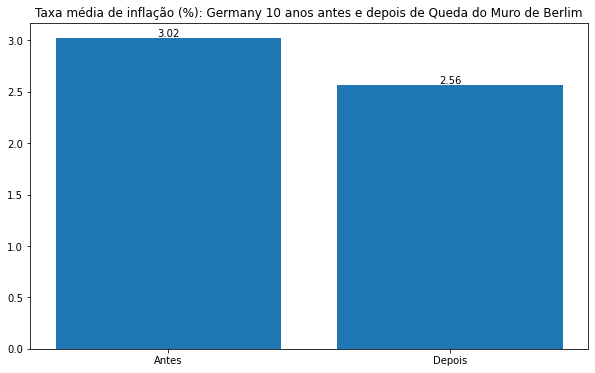

In [17]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Taxa média de inflação (%): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_i,post_i])
for i, v in enumerate([pre_i,post_i]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Life Expectation

In [12]:
# Escolhendo as variáveis de interesse
event = 'Queda do Muro de Berlim'
country = 'Germany'
year = 1989
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_le = round(df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year >= year-lag][df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_le = round(df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year <= year+lag][df_life_exp[df_life_exp.country==country][df_life_exp[df_life_exp.country==country].year <= year+lag].year > year].value.mean(),2)

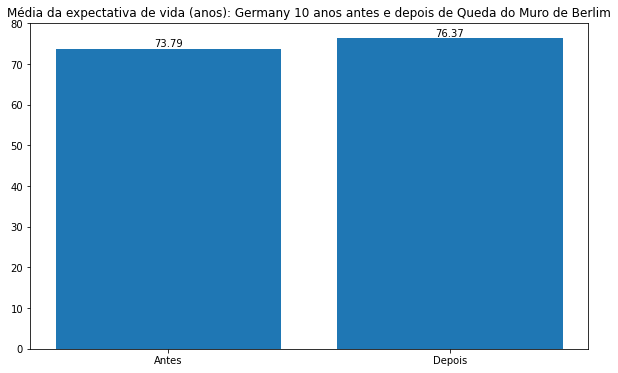

In [20]:
# Gráfico que compara ambos os valores ANTES e DEPOIS
fig, ax = plt.subplots(figsize=(10,6))

plt.title(f'Média da expectativa de vida (anos): {country} {lag} anos antes e depois de {event}')
plt.bar(['Antes','Depois'],[pre_le,post_le])
for i, v in enumerate([pre_le,post_le]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

### 1.2. Vários países

#### Para GDP Growth

In [21]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year >= year-lag][df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country_ref][df_gdp_growth[df_gdp_growth.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country_2][df_gdp_growth[df_gdp_growth.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year <= year+lag][df_gdp_growth[df_gdp_growth.country==country_3][df_gdp_growth[df_gdp_growth.country==country_3].year <= year+lag].year > year].value.mean(),2)

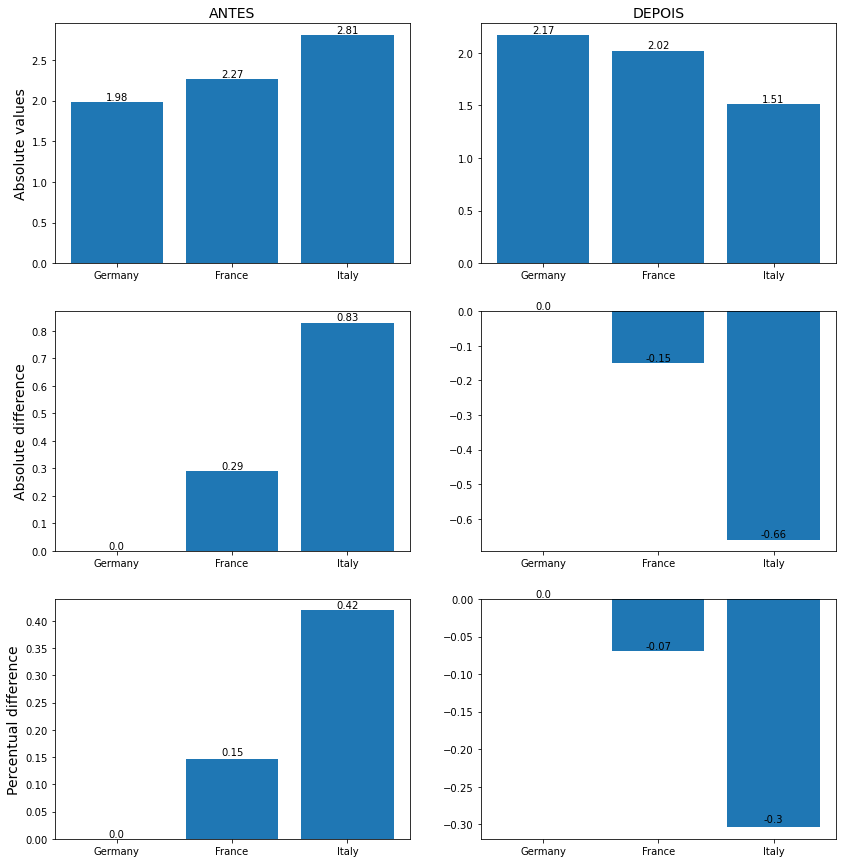

In [22]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15))

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para GDP per Capita

In [23]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year >= year-lag][df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country_ref][df_gdp_p_cap[df_gdp_p_cap.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country_2][df_gdp_p_cap[df_gdp_p_cap.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year <= year+lag][df_gdp_p_cap[df_gdp_p_cap.country==country_3][df_gdp_p_cap[df_gdp_p_cap.country==country_3].year <= year+lag].year > year].value.mean(),2)

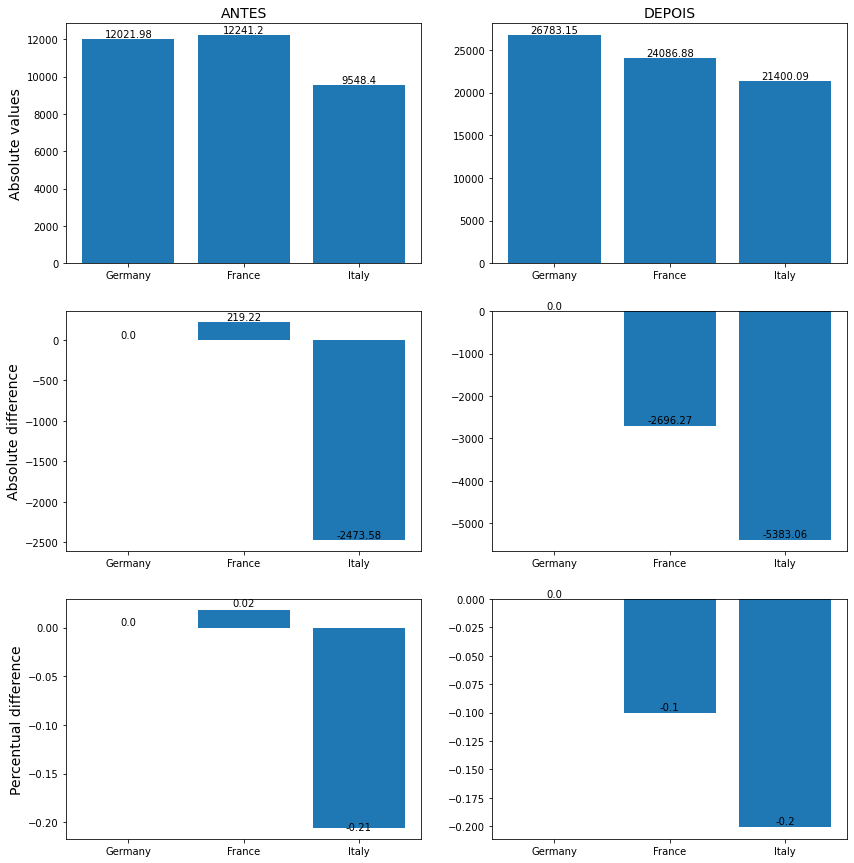

In [24]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15))

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Inflation

In [25]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year >= year-lag][df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year >= year-lag][df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year >= year-lag][df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year <= year+lag][df_inflation[df_inflation.country==country_ref][df_inflation[df_inflation.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year <= year+lag][df_inflation[df_inflation.country==country_2][df_inflation[df_inflation.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year <= year+lag][df_inflation[df_inflation.country==country_3][df_inflation[df_inflation.country==country_3].year <= year+lag].year > year].value.mean(),2)

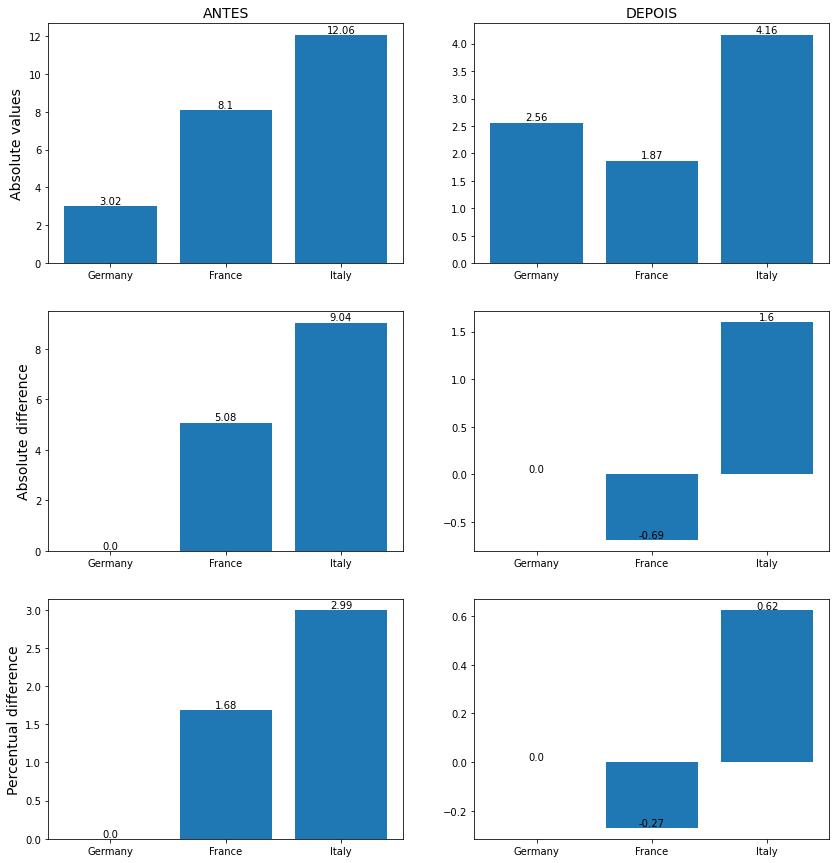

In [26]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15))

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

#### Para Life Expectation

In [27]:
# Repetindo, mas agora para mais países, tomando um deles como referência
event = 'Queda do Muro de Berlim'
country_ref = 'Germany'
year = 1989
country_2 = 'France'
country_3 = 'Italy'
lag = 10

# Valor médio de GDP_GROWTH ANTES do evento
pre_ref = round(df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year >= year-lag][df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year >= year-lag].year < year].value.mean(),2)
pre_2 = round(df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year >= year-lag][df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year >= year-lag].year < year].value.mean(),2)
pre_3 = round(df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year >= year-lag][df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year >= year-lag].year < year].value.mean(),2)
# Valor médio de GDP GROWTH DEPOIS do evento
post_ref = round(df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year <= year+lag][df_life_exp[df_life_exp.country==country_ref][df_life_exp[df_life_exp.country==country_ref].year <= year+lag].year > year].value.mean(),2)
post_2 = round(df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year <= year+lag][df_life_exp[df_life_exp.country==country_2][df_life_exp[df_life_exp.country==country_2].year <= year+lag].year > year].value.mean(),2)
post_3 = round(df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year <= year+lag][df_life_exp[df_life_exp.country==country_3][df_life_exp[df_life_exp.country==country_3].year <= year+lag].year > year].value.mean(),2)

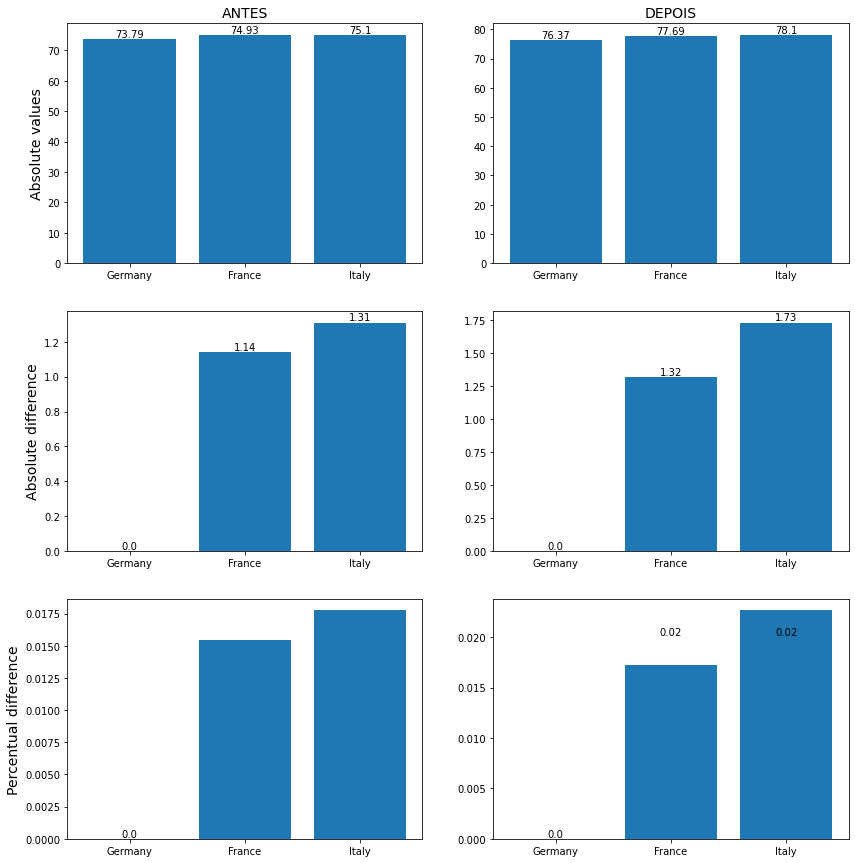

In [28]:
# Gráfico da comparação dos países em relação ao país-referência
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(14,15))

x1 = [country_ref, country_2, country_3]
## Absolute values
y1 = [[pre_ref,pre_2,pre_3], [post_ref,post_2,post_3]]
## Absolute difference
y2 = [[pre_ref-pre_ref, pre_2-pre_ref, pre_3-pre_ref], [post_ref-post_ref, post_2-post_ref, post_3-post_ref]]
## Percentual difference
y3 = [[pre_ref/pre_ref-1, pre_2/pre_ref-1, pre_3/pre_ref-1], [post_ref/post_ref-1, post_2/post_ref-1, post_3/post_ref-1]]

# Gráficos
ax1.set_title('ANTES', fontsize = 14)
ax1.set_ylabel("Absolute values", fontsize = 14)
ax1.bar(x1,y1[0])
ax2.set_title('DEPOIS', fontsize = 14)
ax2.bar(x1,y1[1])
ax3.set_ylabel("Absolute difference", fontsize = 14)
ax3.bar(x1,y2[0])
ax4.bar(x1,y2[1])
ax5.set_ylabel("Percentual difference", fontsize = 14)
ax5.bar(x1,y3[0])
ax6.bar(x1,y3[1])

## Adding value to the bars
for i, v in enumerate([pre_ref,pre_2,pre_3]):
    ax1.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([post_ref,post_2,post_3]):
    ax2.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref-pre_ref,2),round(pre_2-pre_ref,2),round(pre_3-pre_ref,2)]):
    ax3.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref-post_ref,2),round(post_2-post_ref,2),round(post_3-post_ref,2)]):
    ax4.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(pre_ref/pre_ref-1,2),round(pre_2/pre_ref-1,2),round(pre_3/pre_ref-1,2)]):
    ax5.annotate(str(v), xy=(i, v), ha='center', va='bottom')
for i, v in enumerate([round(post_ref/post_ref-1,2),round(post_2/post_ref-1,2),round(post_3/post_ref-1,2)]):
    ax6.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

### **2. Evoluções conjuntas (estático)**

In [61]:
tab_din_all_y = pd.pivot_table(df, values='value', index='year', columns='indicator', aggfunc='mean')

In [83]:
tab_din_all_y.head()

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
year,,,,
1960,NaN,1192.493333,1.826842,67.954324
1961,6.188571,1274.900667,2.122632,68.318108
1962,4.593571,1368.221333,3.857895,68.223243
1963,5.662857,1487.438667,4.117368,68.448649
1964,6.658571,1660.348667,4.762105,69.060811


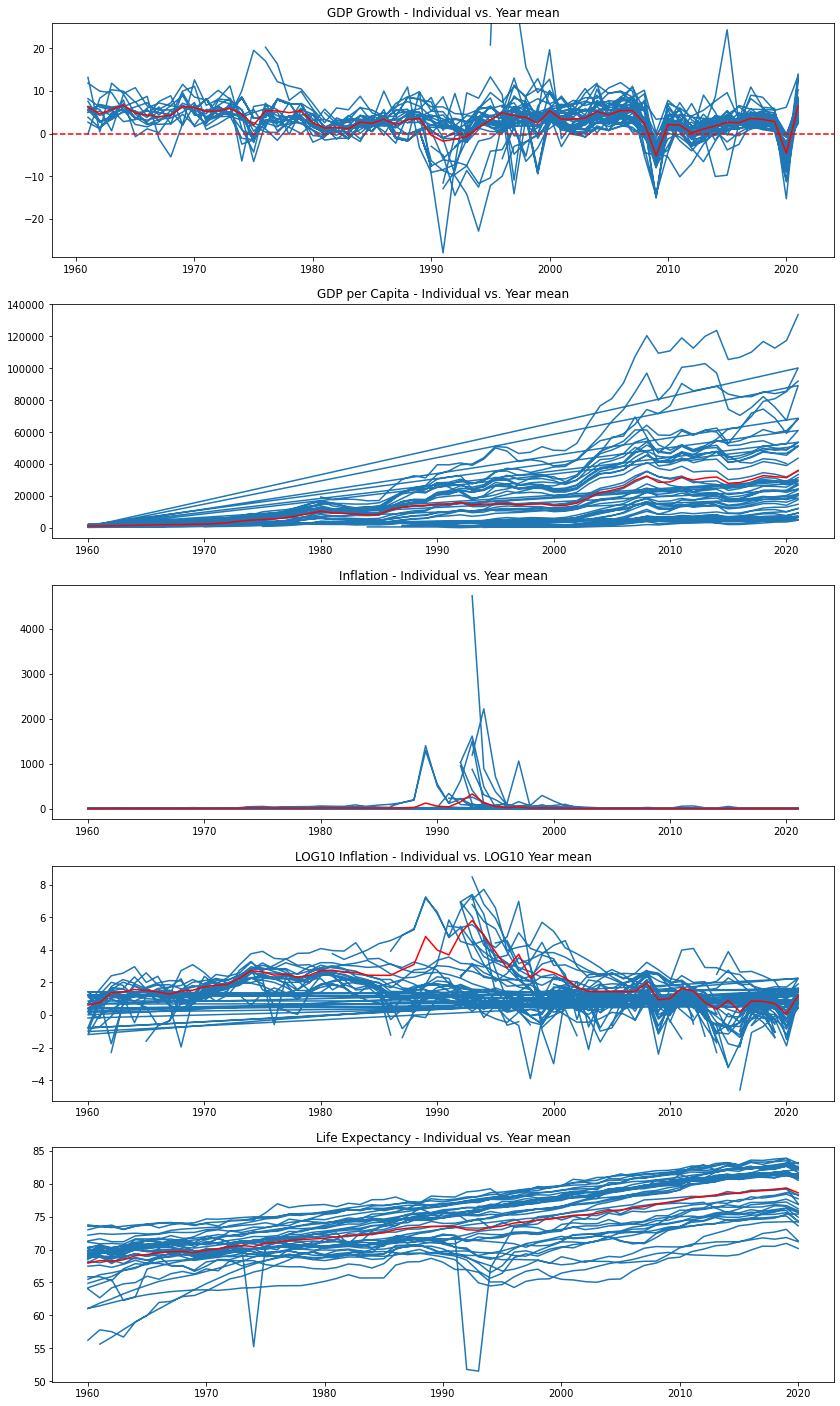

In [103]:
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(14,25))

ax1.set_title('GDP Growth - Individual vs. Year mean')
ax1.plot(df_gdp_growth.year, df_gdp_growth.value)
ax1.plot(tab_din_all_y.index, tab_din_all_y.gdp_growth, 'r')
ax1.axhline(0, color='r', linestyle='--')
ax1.set_ylim([-29,26])

ax2.set_title('GDP per Capita - Individual vs. Year mean')
ax2.plot(df_gdp_p_cap.year, df_gdp_p_cap.value)
ax2.plot(tab_din_all_y.index, tab_din_all_y.gdp_per_capita, 'r')

ax3.set_title('Inflation - Individual vs. Year mean')
ax3.plot(df_inflation.year, df_inflation.value)
ax3.plot(tab_din_all_y.index, tab_din_all_y.inflation, 'r')

ax4.set_title('LOG10 Inflation - Individual vs. LOG10 Year mean')
ax4.plot(df_inflation.year, np.log(df_inflation.value))
ax4.plot(tab_din_all_y.index, np.log(tab_din_all_y.inflation), 'r')

ax5.set_title('Life Expectancy - Individual vs. Year mean')
ax5.plot(df_life_exp.year, df_life_exp.value)
ax5.plot(tab_din_all_y.index, tab_din_all_y.life_expectancy, 'r')

plt.show()

### **3. Tabelas dinâmicas para entender correlações (estático)**

In [29]:
anos_60 = df[df.year >= 1960][df[df.year >= 1960].year <=1969]
anos_70 = df[df.year >= 1970][df[df.year >= 1970].year <=1979]
anos_80 = df[df.year >= 1980][df[df.year >= 1980].year <=1989]
anos_90 = df[df.year >= 1990][df[df.year >= 1990].year <=1999]
anos_00 = df[df.year >= 2000][df[df.year >= 2000].year <=2009]
anos_10 = df[df.year >= 2010][df[df.year >= 2010].year <=2019]
anos_20 = df[df.year >= 2020][df[df.year >= 2020].year <=2029]
cold_war = df[df.year >= 1960][df[df.year >= 1960].year <=1989]
pax_amer = df[df.year >= 1990][df[df.year >= 1990].year <=2019]

In [30]:
anos_60

,country,country_code,indicator,year,value
0,Albania,ALB,gdp_growth,1960,NaN
1,Albania,ALB,gdp_growth,1961,NaN
2,Albania,ALB,gdp_growth,1962,NaN
3,Albania,ALB,gdp_growth,1963,NaN
4,Albania,ALB,gdp_growth,1964,NaN
...,...,...,...,...,...
9367,United Kingdom,GBR,life_expectancy,1965,71.62
9368,United Kingdom,GBR,life_expectancy,1966,71.57
9369,United Kingdom,GBR,life_expectancy,1967,72.12
9370,United Kingdom,GBR,life_expectancy,1968,71.72


In [31]:
# Tabela dinâmica com a média dos valores das variáveis por país (all table)
tab_din_all = pd.pivot_table(df, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por década
tab_din_60 = pd.pivot_table(anos_60, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_70 = pd.pivot_table(anos_70, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_80 = pd.pivot_table(anos_80, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_90 = pd.pivot_table(anos_90, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_00 = pd.pivot_table(anos_00, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_10 = pd.pivot_table(anos_10, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_20 = pd.pivot_table(anos_20, values='value', index='country', columns='indicator', aggfunc='mean')

# Tabela dinâmica por macroperíodo
tab_din_cold_war = pd.pivot_table(cold_war, values='value', index='country', columns='indicator', aggfunc='mean')
tab_din_pax_amer = pd.pivot_table(pax_amer, values='value', index='country', columns='indicator', aggfunc='mean')

In [32]:
tab_din_all

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
country,,,,
Albania,3.517692,2449.977368,15.340333,71.419016
Austria,2.620164,22715.737258,3.215000,75.405082
Belarus,2.512581,3964.870000,178.953793,70.487377
Belgium,2.568197,21671.527419,3.397419,75.701475
Bosnia and Herzegovina,6.304167,3458.355357,1.406875,70.859836
Bulgaria,1.786098,4313.557857,55.246111,71.906066
Croatia,2.561489,11081.748889,130.316944,72.225082
Cyprus,4.789783,16380.670426,3.365968,73.653115
Czechia,1.906129,13681.492813,4.429000,73.242295


### 3.1. Heatmaps

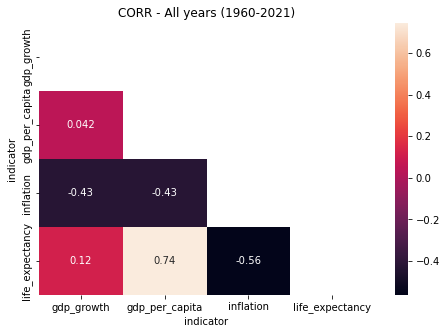

In [33]:
# Correlation map (all data)
plt.figure(figsize=(7.5,5))

plt.title('CORR - All years (1960-2021)')
mask = np.triu(np.ones_like(tab_din_all.corr())) #not to bring mirror results
dataplot = sns.heatmap(tab_din_all.corr(), annot=True, mask=mask) #creating plot

plt.show() 

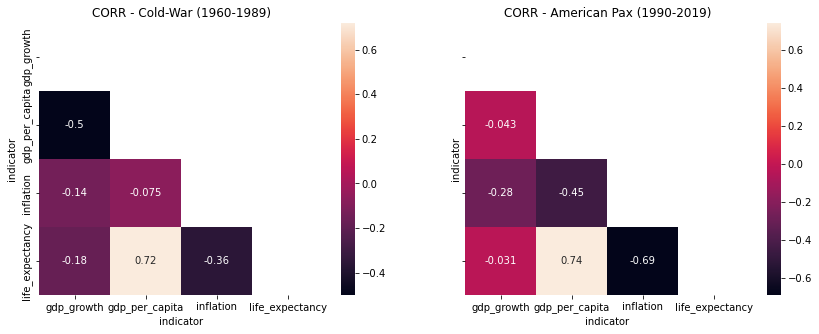

In [34]:
# Correlation map (macroperíodos)
f,(ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(14,5))

ax1.set_title('CORR - Cold-War (1960-1989)')
mask1 = np.triu(np.ones_like(tab_din_cold_war.corr()))
dataplot1 = sns.heatmap(tab_din_cold_war.corr(), annot=True, mask=mask1, ax=ax1)

ax2.set_title('CORR - American Pax (1990-2019)')
mask2 = np.triu(np.ones_like(tab_din_pax_amer.corr()))
dataplot2 = sns.heatmap(tab_din_pax_amer.corr(), annot=True, mask=mask2, ax=ax2)

plt.show()

In [ ]:
# Correlation map (décadas)
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, sharey=True, figsize=(14,15), tight_layout=True)

ax1.set_title('CORR - 60s')
mask1 = np.triu(np.ones_like(tab_din_60.corr()))
dataplot1 = sns.heatmap(tab_din_60.corr(), annot=True, mask=mask1, ax=ax1)

ax2.set_title('CORR - 70s')
mask2 = np.triu(np.ones_like(tab_din_70.corr()))
dataplot2 = sns.heatmap(tab_din_70.corr(), annot=True, mask=mask2, ax=ax2)

ax3.set_title('CORR - 80s')
mask3 = np.triu(np.ones_like(tab_din_80.corr()))
dataplot3 = sns.heatmap(tab_din_80.corr(), annot=True, mask=mask3, ax=ax3)

ax4.set_title('CORR - 90s')
mask4 = np.triu(np.ones_like(tab_din_90.corr()))
dataplot4 = sns.heatmap(tab_din_90.corr(), annot=True, mask=mask4, ax=ax4)

ax5.set_title('CORR - 00s')
mask5 = np.triu(np.ones_like(tab_din_00.corr()))
dataplot5 = sns.heatmap(tab_din_00.corr(), annot=True, mask=mask5, ax=ax5)

ax6.set_title('CORR - 10s')
mask6 = np.triu(np.ones_like(tab_din_10.corr()))
dataplot6 = sns.heatmap(tab_din_10.corr(), annot=True, mask=mask6, ax=ax6)

plt.show()

### 3.2. Evolução das correlações

In [36]:
# Criando os dataframes
evolucao_td_gg = pd.DataFrame()
evolucao_td_gpc = pd.DataFrame()
evolucao_td_i = pd.DataFrame()
evolucao_td_le = pd.DataFrame()

# Adicionando info por década
evolucao_td_gg = evolucao_td_gg.append(tab_din_60.corr()[0:1], ignore_index=True).append(tab_din_70.corr()[0:1], ignore_index=True).append(tab_din_80.corr()[0:1], ignore_index=True).append(tab_din_90.corr()[0:1], ignore_index=True).append(tab_din_00.corr()[0:1], ignore_index=True).append(tab_din_10.corr()[0:1], ignore_index=True)
evolucao_td_gpc = evolucao_td_gpc.append(tab_din_60.corr()[1:2], ignore_index=True).append(tab_din_70.corr()[1:2], ignore_index=True).append(tab_din_80.corr()[1:2], ignore_index=True).append(tab_din_90.corr()[1:2], ignore_index=True).append(tab_din_00.corr()[1:2], ignore_index=True).append(tab_din_10.corr()[1:2], ignore_index=True)
evolucao_td_i = evolucao_td_i.append(tab_din_60.corr()[2:3], ignore_index=True).append(tab_din_70.corr()[2:3], ignore_index=True).append(tab_din_80.corr()[2:3], ignore_index=True).append(tab_din_90.corr()[2:3], ignore_index=True).append(tab_din_00.corr()[2:3], ignore_index=True).append(tab_din_10.corr()[2:3], ignore_index=True)
evolucao_td_le = evolucao_td_le.append(tab_din_60.corr()[3:4], ignore_index=True).append(tab_din_70.corr()[3:4], ignore_index=True).append(tab_din_80.corr()[3:4], ignore_index=True).append(tab_din_90.corr()[3:4], ignore_index=True).append(tab_din_00.corr()[3:4], ignore_index=True).append(tab_din_10.corr()[3:4], ignore_index=True)

In [38]:
# Exemplo
evolucao_td_gg

indicator,gdp_growth,gdp_per_capita,inflation,life_expectancy
0,1.0,-0.649808,-0.060219,-0.197837
1,1.0,-0.660521,-0.179329,-0.523728
2,1.0,-0.260908,-0.484162,0.053978
3,1.0,0.105986,-0.685088,0.105845
4,1.0,-0.619148,0.660829,-0.730717
5,1.0,0.002206,-0.077289,-0.152154


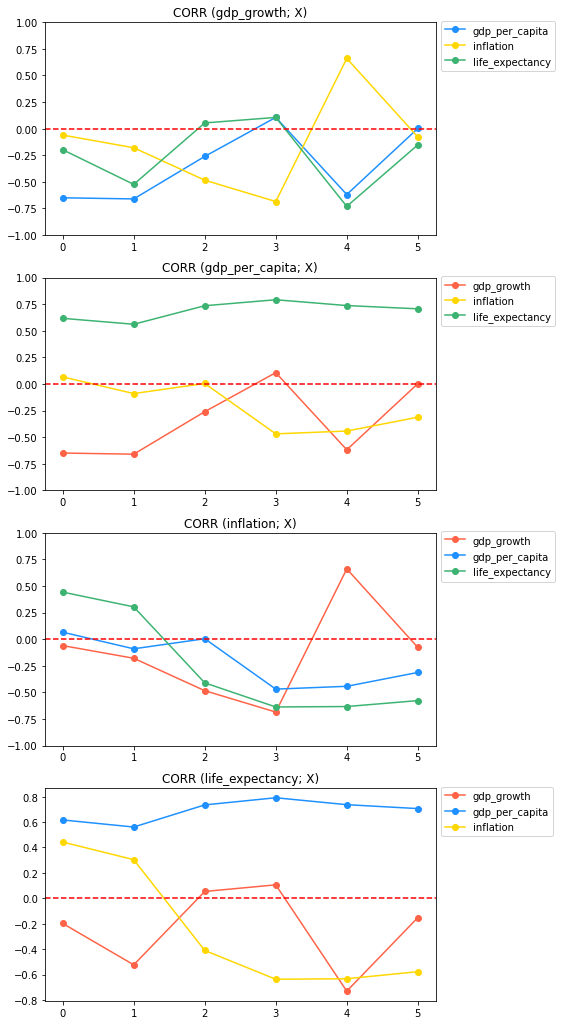

In [48]:
# Evolução da correlação de uma variável com outra X ao longo das décadas
fig,ax = plt.subplots(4,1, figsize=(7,18))

# Crescimento do PIB (%)
ax[0].set_title('CORR (gdp_growth; X)')
ax[0].plot(evolucao_td_gg.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax[0].plot(evolucao_td_gg.inflation, label='inflation', marker='o', color='gold')
ax[0].plot(evolucao_td_gg.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax[0].axhline(0, color='r', linestyle='--')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax[0].set_ylim([-1,1])

# Renda per capita (US$)
ax[1].set_title('CORR (gdp_per_capita; X)')
ax[1].plot(evolucao_td_gpc.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax[1].plot(evolucao_td_gpc.inflation, label='inflation', marker='o', color='gold')
ax[1].plot(evolucao_td_gpc.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax[1].axhline(0, color='r', linestyle='--')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax[1].set_ylim([-1,1])

# Taxa de inflação (%)
ax[2].set_title('CORR (inflation; X)')
ax[2].plot(evolucao_td_i.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax[2].plot(evolucao_td_i.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax[2].plot(evolucao_td_i.life_expectancy, label='life_expectancy', marker='o', color='mediumseagreen')
ax[2].axhline(0, color='r', linestyle='--')
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.89))
ax[2].set_ylim([-1,1])

# Expectativa de vida (anos)
ax[3].set_title('CORR (life_expectancy; X)')
ax[3].plot(evolucao_td_le.gdp_growth, label='gdp_growth', marker='o', color='tomato')
ax[3].plot(evolucao_td_le.gdp_per_capita, label='gdp_per_capita', marker='o', color='dodgerblue')
ax[3].plot(evolucao_td_le.inflation, label='inflation', marker='o', color='gold')
ax[3].axhline(0, color='r', linestyle='--')
ax[3].legend(loc='center left', bbox_to_anchor=(1, 0.89))

plt.show()